In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

ModuleNotFoundError: No module named 'imblearn'

In [2]:
df = pd.read_csv("BankCustomerChurn.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop('customer_id',axis='columns',inplace=True)

In [5]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df = df[df.isnull()!=True]
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df['country'].unique()
df = pd.get_dummies(df, drop_first=True)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [9]:
X = df.drop(['churn'],axis=1)
y = df['churn']
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


<BarContainer object of 2 artists>

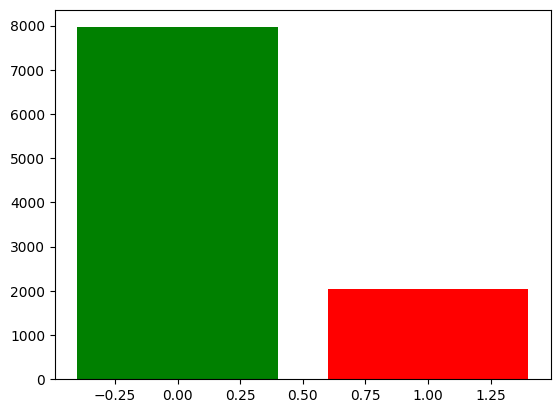

In [10]:
counts = df['churn'].value_counts()
counts

plt.bar(counts.index,counts.values,color=['green','red'])

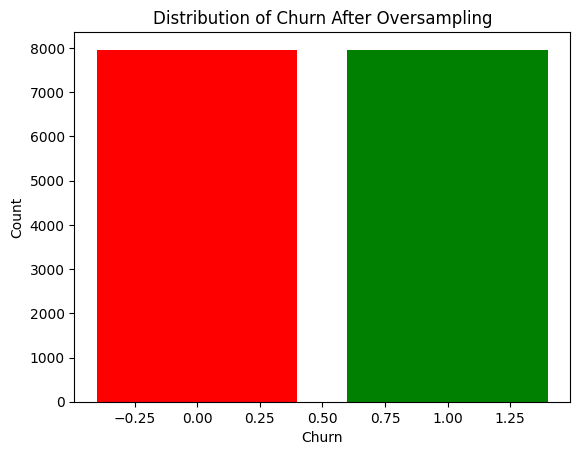

In [11]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

X = df.drop(columns=['churn'])
y = df['churn']

ros = RandomOverSampler(random_state=42)
X_new, y_new = ros.fit_resample(X, y)

df_resampled = X_new.copy()
df_resampled['churn'] = y_new

counts = df_resampled['churn'].value_counts()

plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.title('Distribution of Churn After Oversampling')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [12]:
z_scores = np.abs((df - df.mean()) / df.std())
print(z_scores)

outliers = (z_scores > 3)

df_cleaned = df[~outliers.any(axis=1)]
df = df_cleaned

      credit_score       age    tenure   balance  products_number  \
0         0.326205  0.293503  1.041708  1.225786         0.911538   
1         0.440014  0.198154  1.387468  0.117344         0.911538   
2         1.536717  0.293503  1.032856  1.332987         2.526930   
3         0.501496  0.007456  1.387468  1.225786         0.807696   
4         2.063781  0.388852  1.041708  0.785689         0.911538   
...            ...       ...       ...       ...              ...   
9995      1.246426  0.007456  0.004426  1.225786         0.807696   
9996      1.391870  0.373939  1.724377  0.306363         0.911538   
9997      0.604958  0.278590  0.687096  1.225786         0.911538   
9998      1.256772  0.293503  0.695947  0.022606         0.807696   
9999      1.463698  1.041381  0.350186  0.859922         0.911538   

      credit_card  active_member  estimated_salary     churn  country_Germany  \
0        0.646059       0.970194          0.021885  1.977066         0.578707   
1        

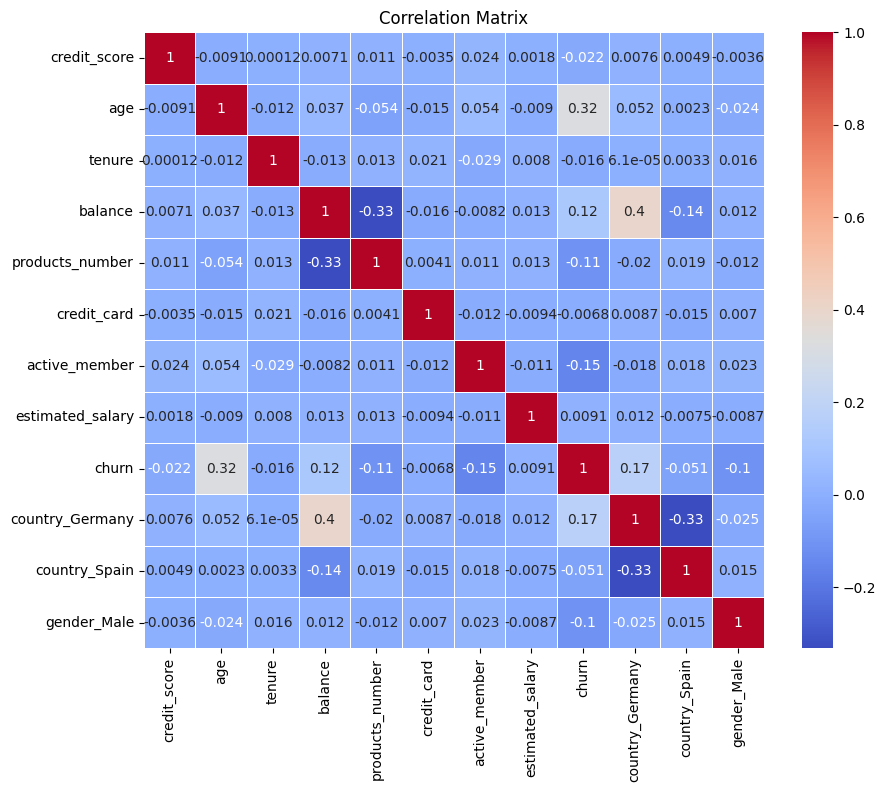

In [13]:
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
scaler = StandardScaler()

X = df_resampled.drop('churn',axis=1)

X_scaled = scaler.fit_transform(X)

X
y = df_resampled['churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.4, random_state=42)

In [16]:
log = LogisticRegression()

log.fit(X_train,y_train)

LogisticRegression()

In [17]:
y_pred = log.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.703971119133574

In [19]:
recall_score(y_test,y_pred)

0.7025998731769182

In [20]:
precision_score(y_test,y_pred)

0.7003792667509482

In [21]:
f1_score(y_test,y_pred)

0.7014878125989237

# using SVC

In [22]:
svm = svm.SVC()

In [23]:
svm.fit(X_train,y_train)

SVC()

In [24]:
y_pred2 = svm.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred2)

0.802699733165908

# using KNN

In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred3 = knn.predict(X_test)

In [29]:
accuracy_score(y_pred3,y_test)

0.7939099042536494

# using DTree

In [30]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred4 = dt.predict(X_test)

In [32]:
accuracy_score(y_pred4,y_test)

0.8912258672107989

In [33]:
precision_score(y_pred,y_test)

0.7025998731769182

In [34]:
recall_score(y_pred,y_test)

0.7003792667509482

In [35]:
f1_score(y_pred,y_test)

0.7014878125989237

# using Random Forest Classifier

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
y_pred5 = rfc.predict(X_test)

In [39]:
accuracy_score(y_test,y_pred5)

0.9321927483911474

In [40]:
recall_score(y_test,y_pred)

0.7025998731769182

In [41]:
precision_score(y_test,y_pred)

0.7003792667509482

In [42]:
f1_score(y_test,y_pred)

0.7014878125989237

# using Gradient Boosting Classifier

In [43]:
gbc = GradientBoostingClassifier()

In [44]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [45]:
y_pred6 = gbc.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred)

0.703971119133574

In [47]:
recall_score(y_test,y_pred6)

0.7812301838934687

In [48]:
f1_score(y_test,y_pred)

0.7014878125989237

In [49]:
precision_score(y_test,y_pred)

0.7003792667509482

In [50]:
results = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RFC','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred),
                                accuracy_score(y_pred2,y_test),
                                accuracy_score(y_pred3,y_test),
                                accuracy_score(y_pred4,y_test),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]
                       })

(0.0, 1.0)

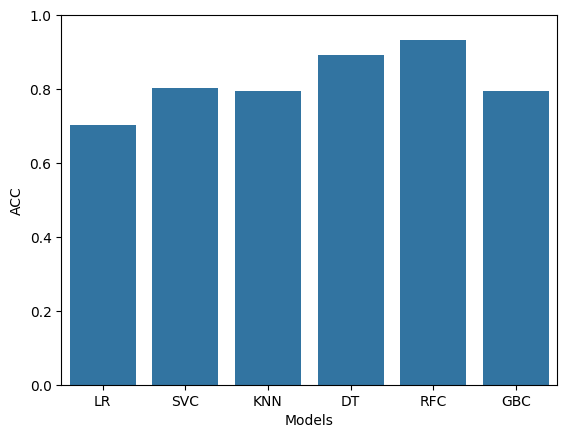

In [51]:
sns.barplot(x='Models',y='ACC',data=results)
plt.ylim(0,1)

# using Stacking

In [52]:
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Generate meta-features
meta_features_train = np.column_stack((model1.predict(X_train), model2.predict(X_train)))
meta_features_test = np.column_stack((model1.predict(X_test), model2.predict(X_test)))

# Train meta-model
meta_model = LogisticRegression()
meta_model.fit(meta_features_train, y_train)

# Make predictions
predictions = meta_model.predict(meta_features_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93
